In [6]:
# imports
import os
import re
import itertools
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import display
import scienceplots
plt.style.use('science')

# parameters for the science style -- too many
plt.style.use(['science','no-latex'])
plt.rcParams.update({
    "font.size": 22,
    "axes.labelsize": 22,
    "legend.fontsize": 22,
    "xtick.labelsize": 22,
    "ytick.labelsize": 22,
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "legend.fancybox": True,
    "legend.frameon": True,
    "legend.edgecolor": "black",
    "axes.facecolor": "white",
    "axes.grid": True,
    "grid.color": "#b7b7b7",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
})

In [7]:
# DATA from open compass tests
# BASE MODELS
llamasize = [7, 13, 30, 65]
llamaaccuracy = [10.16, 20.55, 42, 54.89]

internlm = [1.8, 7, 20]
internlmaccuracy = [30.4, 69.98, 77.10]

qwen15size = [1.8, 7, 14, 72, 110]
qwen15accuracy = [34.87, 54.21, 63.38, 78.85, 85.67]

deepseeksize = [7, 67]
deepseekaccuracy = [20.55, 67.02]

mistralsize = [7, 22]
mistralaccuracy = [67.02, 82.87]

"""
# CHAT MODELS
llama_hf = [7, 13, 70]
llama_hf_accuracy = [29.42, 35.86, 54.66]

internlm_sftsize = [1.8, 7, 20]
internlm_sftaccuracy = [36.69, 70.51, 77.1]

qwen15_chatsize = [0.5, 1.8, 4, 7, 14, 32, 72, 110]
qwen15_chataccuracy = [8.64, 29.64, 51.25, 	58.15, 65.43, 80.59, 77.33, 80.52]

deepseek_chatsize = [7, 67]
deepseek_chataccuracy = [61.03, 81.88]
"""


'\n# CHAT MODELS\nllama_hf = [7, 13, 70]\nllama_hf_accuracy = [29.42, 35.86, 54.66]\n\ninternlm_sftsize = [1.8, 7, 20]\ninternlm_sftaccuracy = [36.69, 70.51, 77.1]\n\nqwen15_chatsize = [0.5, 1.8, 4, 7, 14, 32, 72, 110]\nqwen15_chataccuracy = [8.64, 29.64, 51.25, \t58.15, 65.43, 80.59, 77.33, 80.52]\n\ndeepseek_chatsize = [7, 67]\ndeepseek_chataccuracy = [61.03, 81.88]\n'

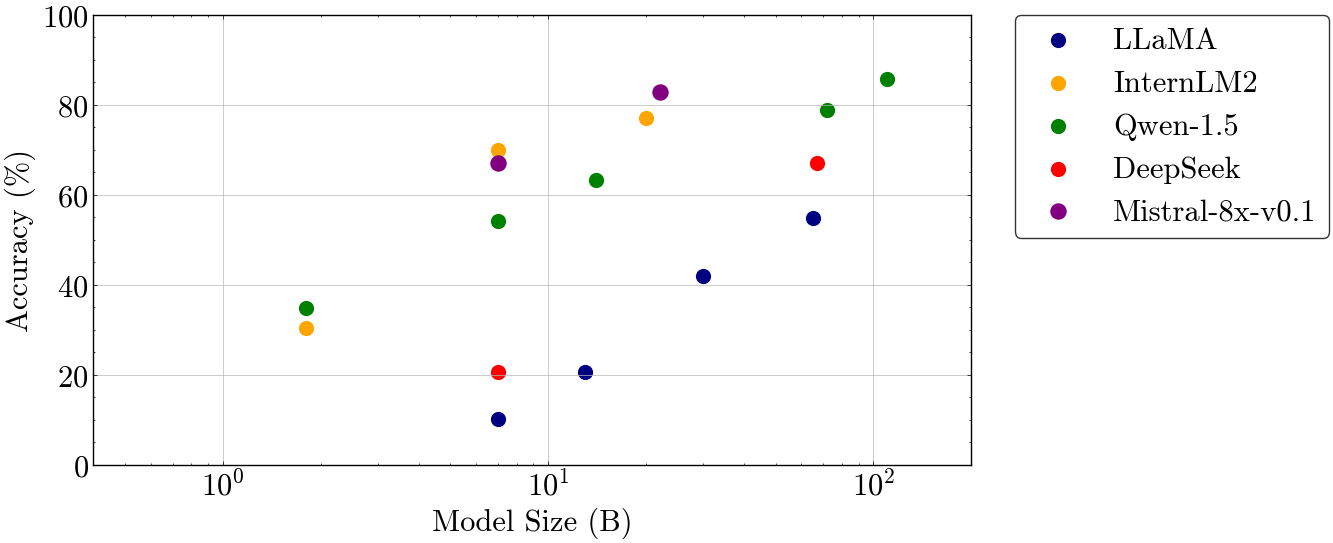

In [10]:

fig = plt.figure(figsize=(14, 6))

base_marker = 'o'
marker_size = 120
marker_edge_color = 'black'
marker_edge_width = 0

# LLaMA (navy)
plt.scatter(llamasize,
            llamaaccuracy,
            color='navy',
            marker=base_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width,
            label='LLaMA')
"""
plt.scatter(llama_hf,
            llama_hf_accuracy,
            color='navy',
            marker=chat_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width,
            label='LLaMA-chat')
"""
# InternLM (orange)
plt.scatter(internlm,
            internlmaccuracy,
            color='orange',
            marker=base_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width,
            label='InternLM2')
"""
plt.scatter(internlm_sftsize,
            internlm_sftaccuracy,
            color='orange',
            marker=chat_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width,
            label='InternLM2-chat')
"""
# Qwen-1.5 (green)
plt.scatter(qwen15size,
            qwen15accuracy,
            color='green',
            marker=base_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width,
            label='Qwen-1.5')
"""
plt.scatter(qwen15_chatsize,
            qwen15_chataccuracy,
            color='green',
            marker=chat_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width,
            label='Qwen-1.5-chat')
"""
# DeepSeek (red)
plt.scatter(deepseeksize,
            deepseekaccuracy,
            color='red',
            marker=base_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width,
            label='DeepSeek')
"""
plt.scatter(deepseek_chatsize,
            deepseek_chataccuracy,
            color='red',
            marker=chat_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width,
            label='DeepSeek-chat')
"""
# Mistral (purple) – only Base available
plt.scatter(mistralsize,
            mistralaccuracy,
            color='purple',
            marker=base_marker,
            s=marker_size+20,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width,
            label='Mistral-8x-v0.1')

# axis settings
plt.xscale('log')
plt.xlabel('Model Size (B)')
plt.ylabel('Accuracy (%)')

# force accuracy to be between 0 and 100
plt.ylim(0, 100)

# better x visuals
plt.xlim(0.4, 200)


# plot

plt.legend(loc='best', bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

plt.tight_layout()
# download as pdf
plt.savefig('model_accuracy.pdf', bbox_inches='tight')
plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_31184\3604962108.py:133: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100)
C:\Users\alejo\AppData\Local\Temp\ipykernel_31184\3604962108.py:134: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 200)


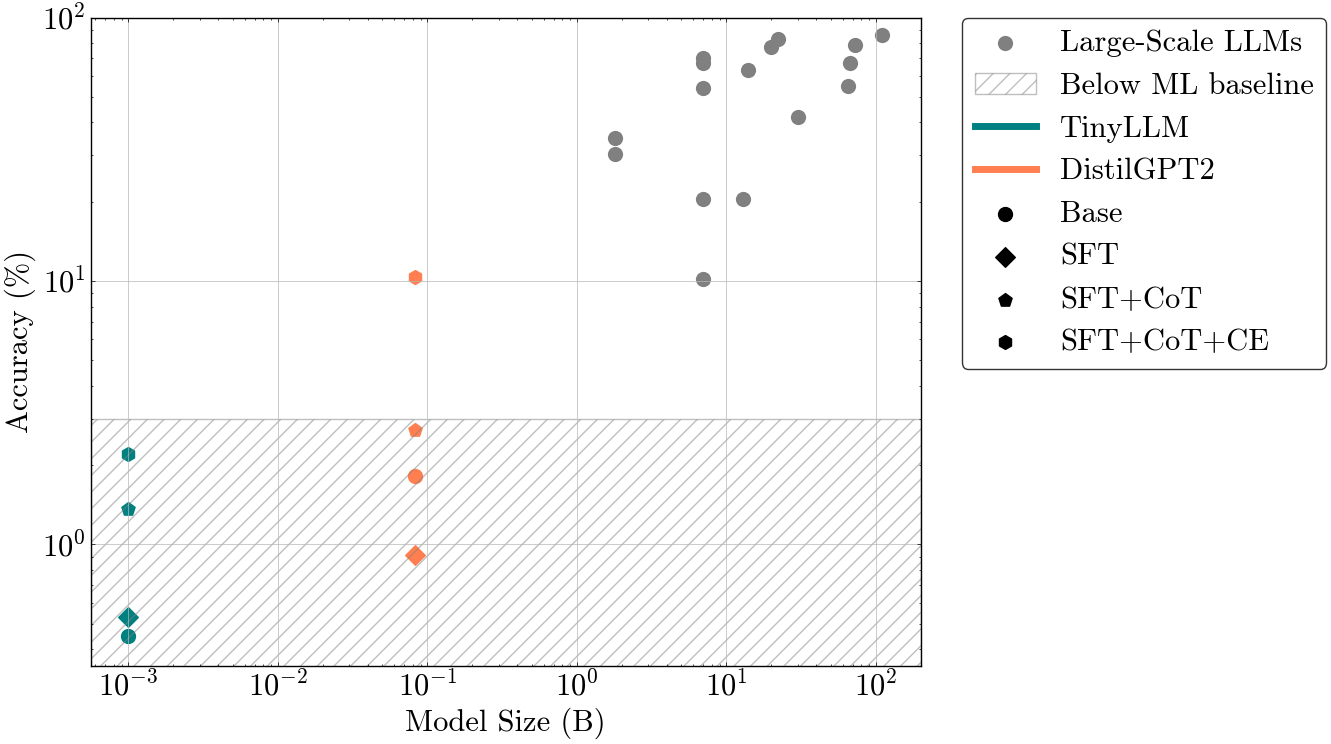

In [16]:
# SUMMARY RESULTS
fig = plt.figure(figsize=(14, 8))

base_marker = 'o'
marker_size = 120
marker_edge_color = 'black'
marker_edge_width = 0


# grey markers for all models
# LLaMA (navy)
plt.scatter(llamasize,
            llamaaccuracy,
            color='grey',
            marker=base_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width)

# InternLM (orange)
plt.scatter(internlm,
            internlmaccuracy,
            color='grey',
            marker=base_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width)

# Qwen-1.5 (green)
plt.scatter(qwen15size,
            qwen15accuracy,
            color='grey',
            marker=base_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width,
            label='Large-Scale LLMs')


# DeepSeek (red)
plt.scatter(deepseeksize,
            deepseekaccuracy,
            color='grey',
            marker=base_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width)

# Mistral (purple) – only Base available
plt.scatter(mistralsize,
            mistralaccuracy,
            color='grey',
            marker=base_marker,
            s=marker_size,
            edgecolors=marker_edge_color,
            linewidths=marker_edge_width)

plt.scatter(0.082,
            1.82,
            color='coral',
            marker=base_marker,
            s=100)

plt.scatter(0.001,
            0.45,
            color='teal',
            marker=base_marker,
            s=100,)


plt.scatter(0.082,
            0.91,
            color='coral',
            marker="D",
            s=100)

plt.scatter(0.001,
            0.53,
            color='teal',
            marker="D",
            s=100,)


plt.scatter(0.082,
            2.73,
            color='coral',
            marker="p",
            s=100)

plt.scatter(0.001,
            1.36,
            color='teal',
            marker="p",
            s=100,)


plt.scatter(0.082,
            10.39,
            color='coral',
            marker="h",
            s=100)

plt.scatter(0.001,
            2.2,
            color='teal',
            marker="h",
            s=100,)



plt.axhspan(0, 3,
            facecolor=(0, 0, 0, 0), 
            edgecolor=(0.5, 0.5, 0.5, 0.5),
            hatch='//',
            linewidth=1,
            label='Below ML baseline')


plt.plot([], color='teal', label='TinyLLM', linewidth=5)
plt.plot([], color='coral', label='DistilGPT2', linewidth=5)
plt.scatter([], [], marker='o', color='black', label='Base', s=100)
plt.scatter([], [], marker='D', color='black', label='SFT', s=100)
plt.scatter([], [], marker='p', color='black', label='SFT+CoT',s=100)
plt.scatter([], [], marker='h', color='black', label='SFT+CoT+CE',s=100)




plt.xscale('log')
plt.yscale('log')
plt.xlabel('Model Size (B)')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xlim(0, 200)


# plot

plt.legend(loc='best', bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

plt.tight_layout()
# download as pdf
plt.savefig('summary_results.pdf', bbox_inches='tight')
plt.show()